In [1]:
import geopandas as gpd
import pandas as pd

import folium
from IPython.display import display


In [20]:
# Load the shapefile
shapefile_path = "C:\\Users\\lukas\\OneDrive - Imperial College London\\0_Thesis\\1data_qgis\\Laos_Provinces\\provinces.shp"
gdf = gpd.read_file(shapefile_path)

# Calculate centroids manually
gdf['centroid'] = gdf.geometry.apply(lambda x: x.representative_point())

# Extract the province names and centroids
province_data = {
    'Province': gdf['NAME_1'],  # Replace 'Name' with the actual column name for province names if different
    'Latitude': gdf.centroid.y,
    'Longitude': gdf.centroid.x
}

# Create a DataFrame
df = pd.DataFrame(province_data)

# Save to Excel
file_path = 'Laos_Provinces_Centroids.xlsx'
df.to_excel(file_path, index=False)


C:\Users\lukas\AppData\Local\Temp\ipykernel_57400\1165236931.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  'Latitude': gdf.centroid.y,
C:\Users\lukas\AppData\Local\Temp\ipykernel_57400\1165236931.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  'Longitude': gdf.centroid.x


In [21]:
# Load the Excel file
file_path = 'Laos_Provinces_Centroids.xlsx'
df = pd.read_excel(file_path)

# Create a map centered around Laos
laos_map = folium.Map(location=[18.2, 105.3], zoom_start=7)

# Add markers for each province
for index, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Province'],
        icon=folium.Icon(icon='info-sign')
    ).add_to(laos_map)

# Save the map to an HTML file
# laos_map.save('Laos_Provinces_Map.html')

# Display the map in the notebook
display(laos_map)

In [22]:
provinces = pd.read_excel('Data/Laos_Provinces_Centroids.xlsx')
provinces

,Province,Area,Area_new24,Latitude,Longitude
0,Attapeu,south,south,14.793855,106.945076
1,Bokeo,north,north,20.351056,100.642907
2,Bolikhamxai,centre,centre,18.488858,104.259675
3,Champasak,south,south,14.771686,105.960564
4,Houaphanh,north,north,20.283857,104.009343
5,Khammouane,centre,south,17.569541,105.260559
6,Luang Namtha,north,north,20.888413,101.143448
7,Luang Prabang,north,north,20.132591,102.552408
8,Oudomxay,north,north,20.418031,101.729691
9,Phongsaly,north,north,21.654447,102.241823


In [23]:
rice_production = pd.read_csv('Data/FAO_rice_production_2022.csv')
rice_production = rice_production[['Province','harvested_2022','yield_2022','production_2022','production_average']]
rice_production#.iloc[:3]

,Province,harvested_2022,yield_2022,production_2022,production_average
0,North,165,3.00,583,-17
1,Phongsaly,16,3.00,53,-22
2,Luang Namtha,20,3.00,52,13
3,Oudomxay,20,3.00,87,-23
4,Bokeo,14,4.00,63,-30
5,Luang Prabang,38,3.00,100,4
6,Houaphanh,14,3.00,65,-40
7,Sainyabuli,43,3.00,163,-18
8,Centre,467,4.00,1871,6
9,Vientiane prefecture,59,4.00,235,-13


In [24]:
demand_province = pd.merge(provinces, rice_production, on='Province', how='inner')
demand_province

,Province,Area,Area_new24,Latitude,Longitude,harvested_2022,yield_2022,production_2022,production_average
0,Attapeu,south,south,14.793855,106.945076,22,4.0,88,9
1,Bokeo,north,north,20.351056,100.642907,14,4.0,63,-30
2,Bolikhamxai,centre,centre,18.488858,104.259675,40,4.0,165,3
3,Champasak,south,south,14.771686,105.960564,106,4.0,464,-4
4,Houaphanh,north,north,20.283857,104.009343,14,3.0,65,-40
5,Khammouane,centre,south,17.569541,105.260559,85,4.0,322,23
6,Luang Namtha,north,north,20.888413,101.143448,20,3.0,52,13
7,Luang Prabang,north,north,20.132591,102.552408,38,3.0,100,4
8,Oudomxay,north,north,20.418031,101.729691,20,3.0,87,-23
9,Phongsaly,north,north,21.654447,102.241823,16,3.0,53,-22


In [25]:
sum_production_2022 = demand_province.production_2022.sum()
demand_province['weighted_avg'] = demand_province.production_2022 / sum_production_2022

In [26]:
hydrogen_demand =  6492334.9371
demand_province['demand_hydrogen'] = hydrogen_demand * demand_province['weighted_avg']
demand_province

,Province,Area,Area_new24,Latitude,Longitude,harvested_2022,yield_2022,production_2022,production_average,weighted_avg,demand_hydrogen
0,Attapeu,south,south,14.793855,106.945076,22,4.0,88,9,0.026895,1.746105e+05
1,Bokeo,north,north,20.351056,100.642907,14,4.0,63,-30,0.019254,1.250052e+05
2,Bolikhamxai,centre,centre,18.488858,104.259675,40,4.0,165,3,0.050428,3.273946e+05
3,Champasak,south,south,14.771686,105.960564,106,4.0,464,-4,0.141809,9.206734e+05
4,Houaphanh,north,north,20.283857,104.009343,14,3.0,65,-40,0.019866,1.289736e+05
5,Khammouane,centre,south,17.569541,105.260559,85,4.0,322,23,0.098411,6.389156e+05
6,Luang Namtha,north,north,20.888413,101.143448,20,3.0,52,13,0.015892,1.031789e+05
7,Luang Prabang,north,north,20.132591,102.552408,38,3.0,100,4,0.030562,1.984210e+05
8,Oudomxay,north,north,20.418031,101.729691,20,3.0,87,-23,0.026589,1.726263e+05
9,Phongsaly,north,north,21.654447,102.241823,16,3.0,53,-22,0.016198,1.051631e+05


In [27]:
demand_province

,Province,Area,Area_new24,Latitude,Longitude,harvested_2022,yield_2022,production_2022,production_average,weighted_avg,demand_hydrogen
0,Attapeu,south,south,14.793855,106.945076,22,4.0,88,9,0.026895,1.746105e+05
1,Bokeo,north,north,20.351056,100.642907,14,4.0,63,-30,0.019254,1.250052e+05
2,Bolikhamxai,centre,centre,18.488858,104.259675,40,4.0,165,3,0.050428,3.273946e+05
3,Champasak,south,south,14.771686,105.960564,106,4.0,464,-4,0.141809,9.206734e+05
4,Houaphanh,north,north,20.283857,104.009343,14,3.0,65,-40,0.019866,1.289736e+05
5,Khammouane,centre,south,17.569541,105.260559,85,4.0,322,23,0.098411,6.389156e+05
6,Luang Namtha,north,north,20.888413,101.143448,20,3.0,52,13,0.015892,1.031789e+05
7,Luang Prabang,north,north,20.132591,102.552408,38,3.0,100,4,0.030562,1.984210e+05
8,Oudomxay,north,north,20.418031,101.729691,20,3.0,87,-23,0.026589,1.726263e+05
9,Phongsaly,north,north,21.654447,102.241823,16,3.0,53,-22,0.016198,1.051631e+05


In [28]:
demand_province[demand_province['Area_new24'] == 'centre'].demand_hydrogen.sum()

1525857.4470140282

In [29]:
demand_province[demand_province['Area_new24'] == 'north'].demand_hydrogen.sum()

1156794.397411155

In [30]:
demand_province[demand_province['Area_new24'] == 'south'].demand_hydrogen.sum()

3809683.092674816

In [18]:
demand_province.demand_hydrogen.sum()

6492334.937099999

In [32]:

# Assuming demand_province is your DataFrame
# Group by 'Area_new24' and calculate the mean for Latitude and Longitude
centroids = demand_province.groupby('Area_new24')[['Latitude', 'Longitude']].mean().reset_index()

# Display the centroids
centroids


,Area_new24,Latitude,Longitude
0,centre,18.722583,103.116514
1,north,20.381290,101.952300
2,south,15.853203,106.197453


In [33]:
import folium

# Create a base map centered around the average latitude and longitude of all points
map_center = [centroids['Latitude'].mean(), centroids['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=6)

# Add markers for each centroid
for i, row in centroids.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Area_new24'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# Display the map
m


# VISUALISATION

In [28]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


In [33]:
# Path to your GeoJSON file
geojson_path = r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Laos_specific\Data\provinces_laos.geojson'

# Load the GeoJSON file into a GeoDataFrame
gdf = gpd.read_file(geojson_path)

In [34]:

# Create a DataFrame with the area information
area_data = {
    'Province_old': ['Attapeu', 'Bokeo', 'Bolikhamxai', 'Champasak', 'Houaphanh', 
                 'Khammouane', 'Luang Namtha', 'Luang Prabang', 'Oudomxay', 
                 'Phongsaly', 'Salavan', 'Savannakhet', 'Vientiane', 
                 'Vientiane prefecture', 'Sainyabuli', 'Xaisomboun', 
                 'Sekong', 'Xiangkhouang'],
    'Province':['Attapeu', 'Bokeo', 'Bolikhamxai', 'Champasack','Houaphan',
                'Khammouan', 'Louangnamtha', 'Louangphabang','Oudomxai',
                'Phongsaly', 'Salavan', 'Savannakhet','Vientiane',
                'Vientiane Capital','Xaignabouly','Xaisomboon',
                'Sekong','Xiengkhouang'],
    'Area_new24': ['south', 'north', 'centre', 'south', 'north', 'south', 
                   'north', 'north', 'north', 'north', 'south', 'south', 
                   'centre', 'centre', 'north', 'centre', 'south', 'centre']
}

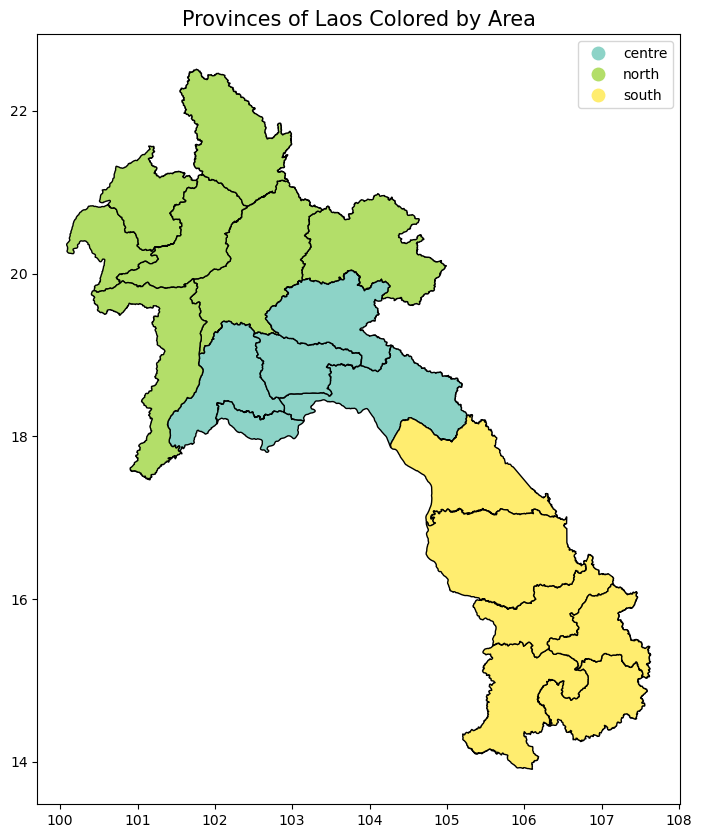

In [35]:

# Convert to DataFrame
area_df = pd.DataFrame(area_data)

# Merge the shapefile GeoDataFrame with the area DataFrame
gdf = gdf.merge(area_df, left_on='ADM1_EN', right_on='Province', how='left')

# Define colors for each area category
colors = {
    'north': 'lightblue',
    'centre': 'lightgreen',
    'south': 'lightcoral'
}

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
gdf.plot(column='Area_new24', cmap='Set3', ax=ax, edgecolor='black', legend=True, legend_kwds={'bbox_to_anchor': (1, 1)})

# Add a title
ax.set_title('Provinces of Laos Colored by Area', fontsize=15)

# Show the plot
plt.show()

C:\Users\lukas\AppData\Local\Temp\ipykernel_11940\806981159.py:26: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  gdf.plot(column='Area_new24', color=gdf['Area_new24'].map(subdued_colors), ax=ax, edgecolor='black')


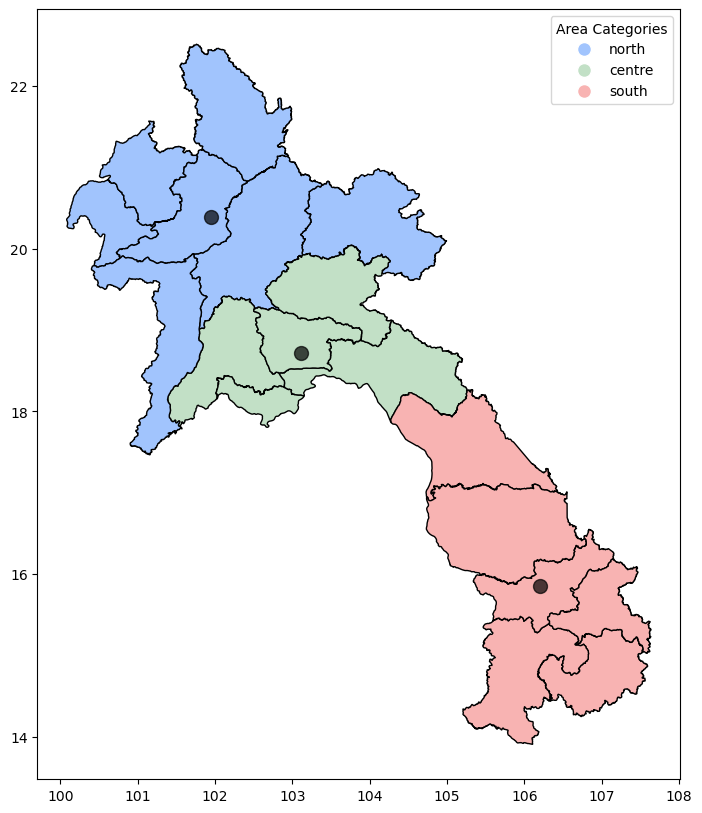

In [40]:
from shapely.geometry import Point

# Define subdued colors for each area category
subdued_colors = {
    'north': '#a1c4fd',  # Light blue
    'centre': '#c2e0c6', # Light green
    'south': '#f8b3b2'   # Light coral
}

# Create a DataFrame for the locations with lat/long
location_data = {
    'Area_new24': ['centre', 'north', 'south'],
    'Latitude': [18.722583, 20.381290, 15.853203],
    'Longitude': [103.116514, 101.952300, 106.197453]
}
locations_df = pd.DataFrame(location_data)

# Convert the locations DataFrame to a GeoDataFrame
geometry = [Point(xy) for xy in zip(locations_df['Longitude'], locations_df['Latitude'])]
locations_gdf = gpd.GeoDataFrame(locations_df, geometry=geometry, crs='EPSG:4326')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the provinces with subdued colors
gdf.plot(column='Area_new24', color=gdf['Area_new24'].map(subdued_colors), ax=ax, edgecolor='black')

# Plot the locations
locations_gdf.plot(ax=ax, color='black', markersize=100, edgecolor='k', alpha=0.7)

# Create a custom legend
# Custom legend entries
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, linestyle='') for color in subdued_colors.values()]
labels = list(subdued_colors.keys())

# Add the custom legend to the plot
ax.legend(handles=handles, labels=labels, title="Area Categories", bbox_to_anchor=(1, 1))

# Add a title
# ax.set_title('Provinces of Laos Colored by Area with Specific Locations', fontsize=15)

# Show the plot
plt.show()

C:\Users\lukas\AppData\Local\Temp\ipykernel_11940\367502672.py:40: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  gdf.plot(column='Area_new24', color=gdf['Area_new24'].map(subdued_colors), ax=ax, edgecolor='black', alpha=0.7)


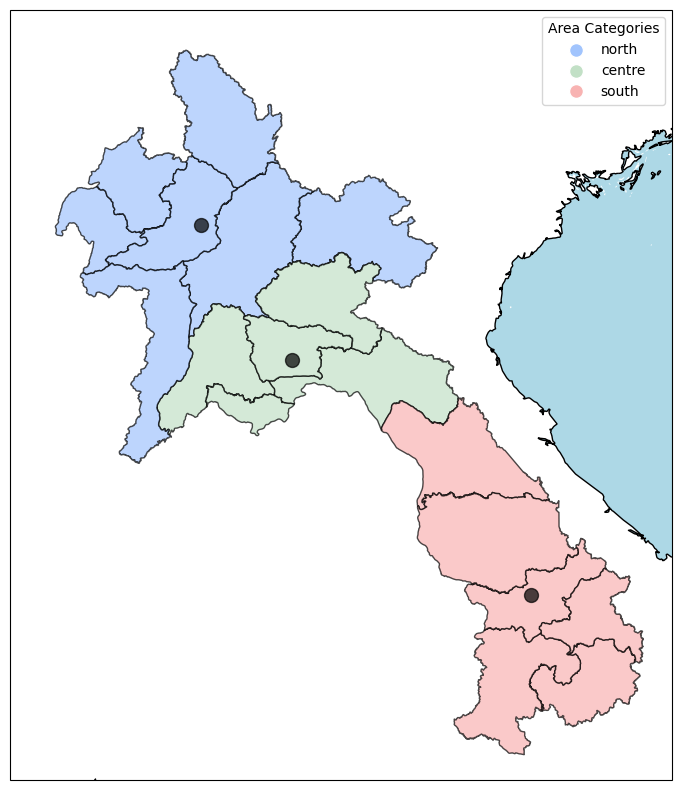

In [44]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Point
import pandas as pd

# Define subdued colors for each area category
subdued_colors = {
    'north': '#a1c4fd',  # Light blue
    'centre': '#c2e0c6', # Light green
    'south': '#f8b3b2'   # Light coral
}

# Create a DataFrame for the locations with lat/long
location_data = {
    'Area_new24': ['centre', 'north', 'south'],
    'Latitude': [18.722583, 20.381290, 15.853203],
    'Longitude': [103.116514, 101.952300, 106.197453]
}
locations_df = pd.DataFrame(location_data)

# Convert the locations DataFrame to a GeoDataFrame
geometry = [Point(xy) for xy in zip(locations_df['Longitude'], locations_df['Latitude'])]
locations_gdf = gpd.GeoDataFrame(locations_df, geometry=geometry, crs='EPSG:4326')

# Load the provinces GeoDataFrame (replace this with your actual file path or loading method)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features with Cartopy
ax.set_facecolor('white')
# ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='lightblue')
# ax.add_feature(cfeature.BORDERS, linestyle='--', edgecolor='black')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')

# Plot the provinces with subdued colors
gdf.plot(column='Area_new24', color=gdf['Area_new24'].map(subdued_colors), ax=ax, edgecolor='black', alpha=0.7)

# Plot the locations
locations_gdf.plot(ax=ax, color='black', markersize=100, edgecolor='k', alpha=0.7)

# Create a custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, linestyle='') for color in subdued_colors.values()]
labels = list(subdued_colors.keys())

# Add the custom legend to the plot
ax.legend(handles=handles, labels=labels, title="Area Categories", bbox_to_anchor=(1, 1))

# Add a title
# ax.set_title('Provinces of Laos Colored by Area with Specific Locations', fontsize=15)

# Set extent to focus closely on Laos (adjust as needed)
ax.set_extent([99.5, 108, 13.6, 23], crs=ccrs.PlateCarree())

# Save the plot as an image
plt.savefig('provinces_with_locations.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
